# Mean Normalization dalam Sistem Rekomendasi

Pada kursus sebelumnya, Anda telah melihat bagaimana pada **linear regression**, normalisasi data dapat membantu algoritma berjalan lebih cepat. Dalam kasus membangun sistem rekomendasi, di mana skala nilainya seperti rating film dari 1 hingga 5, algoritma akan bekerja lebih efisien dan performa sedikit lebih baik jika Anda melakukan **mean normalization** terlebih dahulu. Ini berarti Anda menormalkan rating film agar memiliki rata-rata yang konsisten. Mari kita lihat apa artinya.

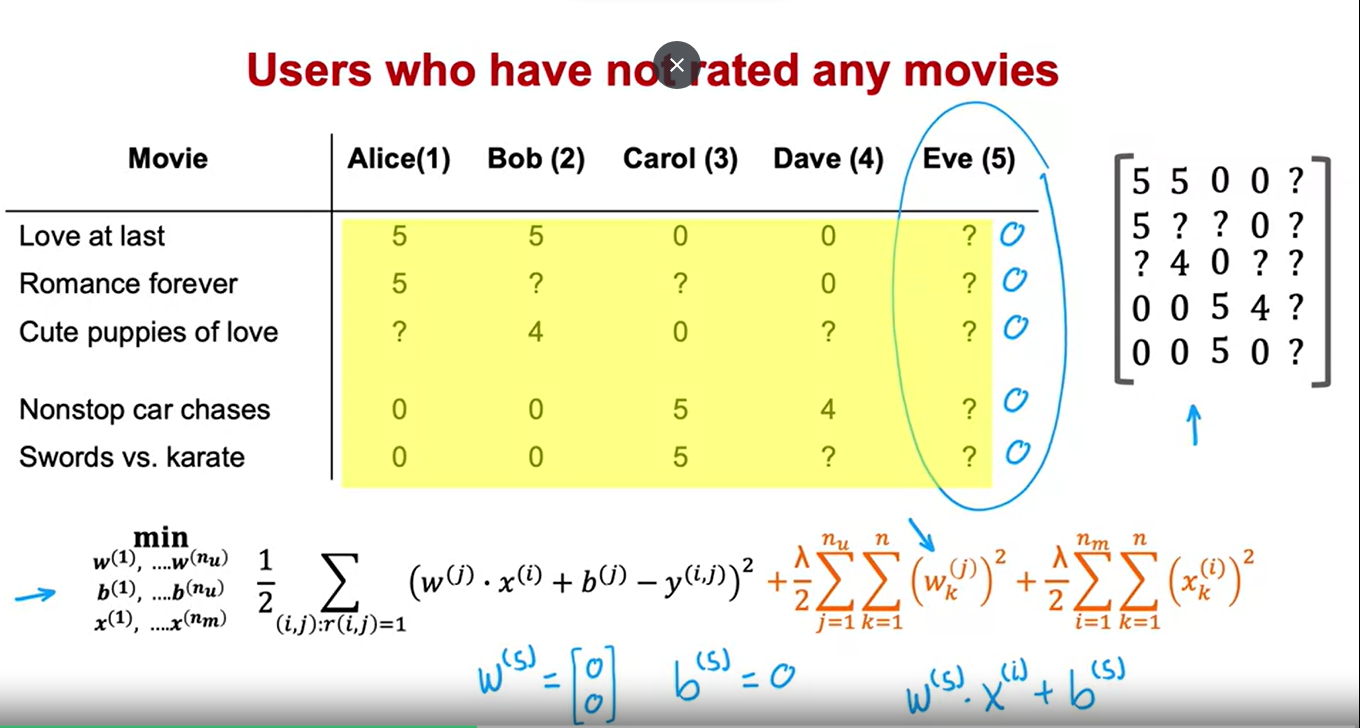

## Data Set yang Digunakan

Berikut adalah data set yang telah kita gunakan. Di bawah ini adalah **cost function** yang digunakan untuk mempelajari parameter model. Untuk menjelaskan mean normalization, saya akan menambahkan pengguna kelima, **Eve**, yang belum memberikan rating pada film apapun. Menambahkan mean normalization akan membantu algoritma membuat prediksi yang lebih baik untuk pengguna Eve.

Jika Anda melatih algoritma **collaborative filtering** pada data ini, karena kita mencoba membuat parameter **w** kecil akibat dari regularisasi, algoritma akan mengatur **w** untuk Eve menjadi `[0, 0]` dan mungkin juga **b(5) = 0**. Karena Eve belum memberikan rating film, parameter **w** dan **b** tidak mempengaruhi term pertama dalam cost function karena tidak ada rating Eve yang berperan dalam **squared error cost function**.

Dengan demikian, meminimalkan ini berarti membuat parameter **w** sekecil mungkin. Jika **b** diinisialisasi ke 0, Anda akan mendapatkan **b(5) = 0** juga. Namun, jika ini adalah parameter untuk pengguna kelima (Eve), prediksi algoritma untuk rating film Eve akan menjadi **w(5) . x(i) + b(5)**, dan hasilnya akan sama dengan 0, yang berarti Eve akan memberi semua film rating 0. Ini tidak membantu, karena seharusnya ada cara yang lebih baik untuk memprediksi rating bagi pengguna yang belum memberikan rating.

## Mean Normalization

Di sini **mean normalization** akan membantu algoritma membuat prediksi yang lebih baik untuk rating film pengguna baru yang belum memberikan rating. Untuk mendeskripsikan mean normalization, saya akan mengambil semua nilai dalam tabel termasuk tanda tanya untuk Eve, lalu memasukkannya ke dalam matriks dua dimensi.

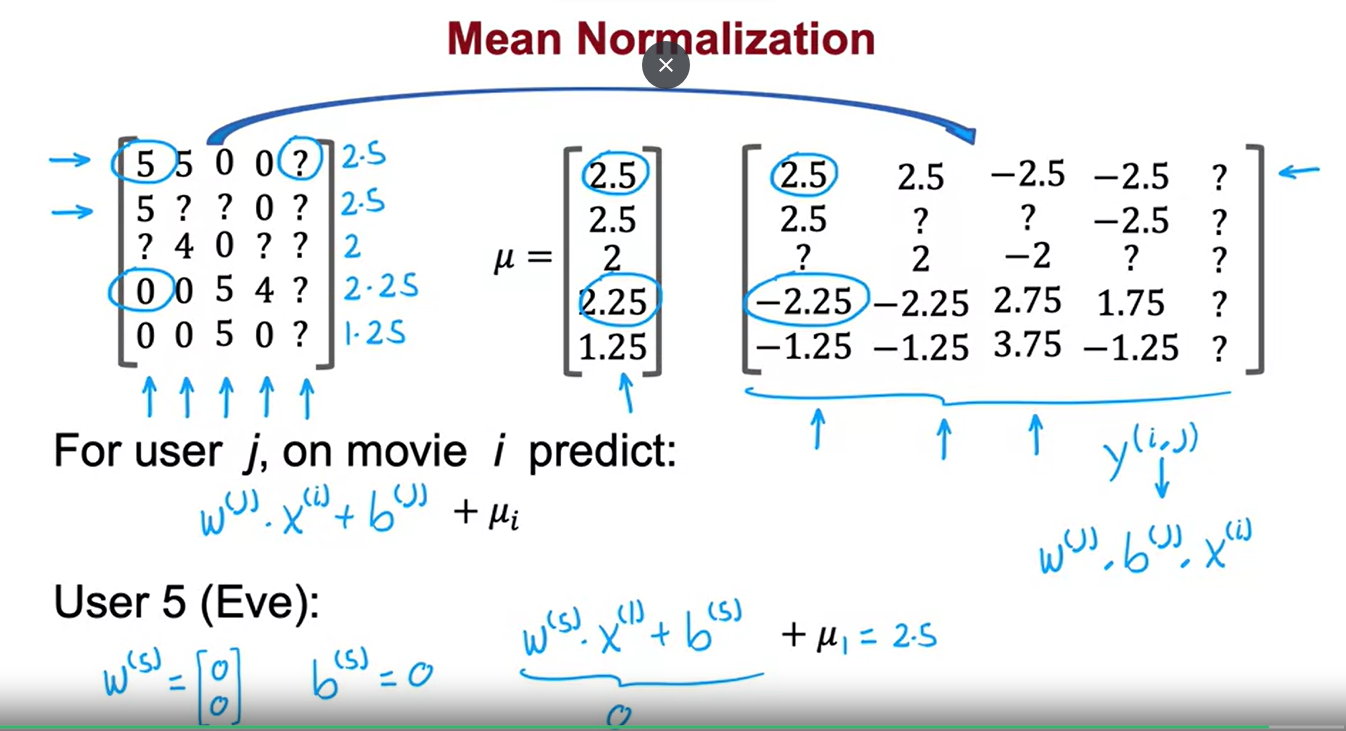

### Langkah-Langkah:

1. Hitung **average rating** untuk setiap film.
   - Misalnya, untuk film 1 dengan rating 5, 5, 0, dan 0, rata-ratanya adalah 2.5. 
   - Demikian juga untuk film lainnya.
   
2. Hasil rata-rata ini akan dimasukkan ke dalam sebuah vektor yang kita sebut **µ** (mu), yang merupakan rata-rata rating untuk setiap film.

3. Setelah itu, kita mengurangi setiap rating dengan nilai rata-rata dari masing-masing film.
   - Contoh: rating 5 dikurangi 2.5 akan menjadi 2.5, dan seterusnya.

4. Nilai baru ini menjadi nilai baru **Y(i,j)**. Kita berpura-pura bahwa pengguna 1 memberikan rating 2.5 untuk film 1 dan -2.25 untuk film 4.

### Prediksi dengan Mean Normalization

Ketika algoritma melakukan prediksi rating untuk pengguna baru seperti Eve yang belum memberikan rating, mean normalization memungkinkan algoritma untuk memperkirakan rating yang lebih realistis. Sebagai contoh, prediksi rating Eve untuk film 1 adalah **w(5) . x1 + b(5)**, yang dengan mean normalization akan menjadi 2.5, bukan 0.

Jadi, daripada memprediksi semua rating sebagai 0 karena pengguna belum memberikan rating, mean normalization membantu memprediksi rating dengan menggunakan rata-rata rating dari pengguna lain.

### Mengapa Mean Normalization Penting?

Dengan menormalkan rata-rata rating dari setiap film ke nol, algoritma optimisasi untuk sistem rekomendasi akan berjalan lebih cepat dan lebih baik untuk pengguna yang belum memberikan banyak rating atau bahkan belum memberikan rating sama sekali. 

## Alternatif Normalisasi

Ada alternatif lain, seperti menormalkan **kolom** matriks agar memiliki mean nol, yang juga dapat menjadi opsi. Namun, dalam kasus ini, menormalkan **baris** matriks lebih penting karena kita ingin memberikan rating yang masuk akal untuk pengguna baru.

## Kesimpulan

Mean normalization membuat algoritma berjalan sedikit lebih cepat dan, yang lebih penting, memberikan prediksi yang jauh lebih baik dan lebih masuk akal untuk pengguna yang belum memberikan banyak rating atau belum memberikan rating sama sekali. Detail implementasi mean normalization ini akan membuat sistem rekomendasi Anda bekerja jauh lebih baik.

Selanjutnya, kita akan melihat bagaimana Anda bisa mengimplementasikan ini dalam **TensorFlow**.
